In [1]:
import bokeh
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from datetime import datetime
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook, output_file, save
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import gridplot,layout
from bokeh.models import FactorRange
import pandas as pd 
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

output_notebook()

import warnings
warnings.filterwarnings('ignore')
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

Loading BokehJS ...

In [2]:
import bokeh
bokeh.__version__

'2.0.1'

In [3]:
description = pd.read_csv('Covid19Canada-master/codebook.csv')

n_cases = pd.read_csv('Covid19Canada-master/cases.csv')
n_death = pd.read_csv('Covid19Canada-master/mortality.csv')

n_recovered = pd.read_csv('Covid19Canada-master/recovered_cumulative.csv')
n_testing = pd.read_csv('Covid19Canada-master/testing_cumulative.csv')

In [4]:
display(description)

,Variable,Description,Label
0,case_id,National Case ID Number,NaN
1,provincial_case_id,Provincial Case ID Number,NaN
2,age,"Age, if specific age not given then range prov...",NaN
3,sex,Sex,NaN
4,health_region,"Health region, if reported",NaN
5,province,Province,NaN
6,country,Country,NaN
7,date_report,Reported date (i.e. public announcement date) ...,NaN
8,report_week,Week of Report (Sundays are 1st day of week),NaN
9,travel_yn,Travel history (yes/no),"0=no, 1=yes, Not Reported"


In [5]:
display(n_cases.head(1))
print(n_cases.shape)
display(n_death.head(1))
print(n_death.shape)
display(n_recovered.head(1))
print(n_recovered.shape)
display(n_testing.head(1))
print(n_testing.shape)

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source
0,1,1,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN


(6320, 15)


,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,08-03-2020,https://news.gov.bc.ca/releases/2020HLTH0068-0...,Lynn Valley Resident,NaN


(66, 12)


,date_recovered,province,cumulative_recovered
0,29-03-2020,Alberta,73.0


(611, 3)


,date_testing,province,cumulative_testing
0,29-03-2020,Alberta,44999


(195, 3)


# Number of Cases in Canada

In [6]:
display(n_cases.head(1))

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source
0,1,1,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN


In [7]:
#n_cases = n_cases[n_cases.columns.difference(['travel_history_country', 'locally_acquired',
#                                    'additional_info','additional_source'])]

In [8]:
n_cases = n_cases.iloc[:,:11]
n_cases['date_report'] = pd.to_datetime(n_cases['date_report'], dayfirst = True)
n_cases['report_week'] = pd.to_datetime(n_cases['report_week'], dayfirst = True)
n_cases.head(1)

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country
0,1,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,1,China


In [9]:
n_cases['people'] = 1

In [10]:
all_gender = n_cases.groupby(['sex'])['people'].sum().sort_values(ascending = False).reset_index();
all_gender_factors = pd.unique(all_gender['sex'])
all_gender_data = ColumnDataSource(all_gender)

all_age = n_cases.groupby(['age'])['people'].sum().sort_values(ascending = False).reset_index();
all_age_factors = pd.unique(all_age['age'])
all_age_data = ColumnDataSource(all_age)

sex_case = n_cases.loc[n_cases['sex'] != 'Not Reported']
sex_case = sex_case.groupby(['sex'])['people'].sum().sort_values(ascending = False).reset_index();
sex_case_factors = pd.unique(sex_case['sex'])
sex_case_data = ColumnDataSource(sex_case)

age_case = n_cases.loc[n_cases['age'] != 'Not Reported']
age_case = age_case.groupby(['age'])['people'].sum().sort_values(ascending = False).reset_index();
age_case_factors = pd.unique(age_case['age'])
age_case_data = ColumnDataSource(age_case)

sex_age = n_cases.loc[(n_cases['age'] != 'Not Reported') & (n_cases['sex'] != 'Not Reported')]
sex_age = sex_age.groupby(['age', 'sex'])['people'].sum().reset_index()
sex_age['label'] = tuple(zip(sex_age['age'], sex_age['sex']))
sex_age_data = ColumnDataSource(sex_age)

In [11]:
plot1 = figure(plot_width = 495, plot_height = 300, x_range = FactorRange(factors = all_gender_factors))
plot2 = figure(plot_width = 495, plot_height = 300, x_range = FactorRange(factors = all_age_factors))
plot3 = figure(plot_width = 495, plot_height = 300, x_range = FactorRange(factors = sex_case_factors))
plot4 = figure(plot_width = 495, plot_height = 300, x_range = FactorRange(factors = age_case_factors))
plot5 = figure(plot_width = 990, plot_height = 300, x_range = FactorRange(factors = sex_age['label']))


plot1.vbar(x = 'sex' , top = 'people' , width = 0.8, source = all_gender_data)
plot2.vbar(x = 'age' , top = 'people' , width = 0.8, source = all_age_data)
plot3.vbar(x = 'sex' , top = 'people' , width = 0.8, source = sex_case_data)
plot4.vbar(x = 'age' , top = 'people' , width = 0.8, source = age_case_data)
plot5.vbar(x = 'label' , top = 'people' , width = 0.8, source = sex_age_data,\
          fill_color=factor_cmap('label', factors= sex_age['sex'] , start=1, end=2, palette = Spectral6))

plot1.add_tools(HoverTool(tooltips = [('Sales', '@people')]))
plot2.add_tools(HoverTool(tooltips = [('Sales', '@people')]))
plot3.add_tools(HoverTool(tooltips = [('Sales', '@people')]))
plot4.add_tools(HoverTool(tooltips = [('Sales', '@people')]))
plot5.add_tools(HoverTool(tooltips = [('Sales', '@people')]))

plot2.xaxis.major_label_orientation = 1
plot4.xaxis.major_label_orientation = 1
plot5.xaxis.major_label_orientation = 1

grid = layout([[plot1,plot2],[plot3, plot4],[plot5]]) 


show(grid)

In [23]:
data_report = pd.DataFrame(n_cases['date_report'].value_counts()).reset_index().sort_values(by = 'index')
data_report_data = ColumnDataSource(data_report)
report_week = pd.DataFrame(n_cases['report_week'].value_counts()).reset_index().sort_values(by = 'index')
report_week_data = ColumnDataSource(report_week)

In [49]:
plot1 = figure(plot_width = 900, plot_height = 300,x_axis_type="datetime")
plot2 = figure(plot_width = 900, plot_height = 300,x_axis_type="datetime")
plot3 = figure(plot_width = 900, plot_height = 300,x_axis_type="datetime")
plot1.line(x = 'index' , y = 'date_report' , width = 0.8, source = data_report_data);
plot2.line(x = 'index' , y = 'report_week' , width = 0.8, source = report_week_data);
plot3.line(x = 'index' , y = 'date_report' , width = 0.8, source = data_report_data);
plot3.line(x = 'index' , y = 'report_week' , width = 0.8, source = report_week_data, color= 'orange');

grid = layout([[plot1],[plot2],[plot3]]) 

show(grid)

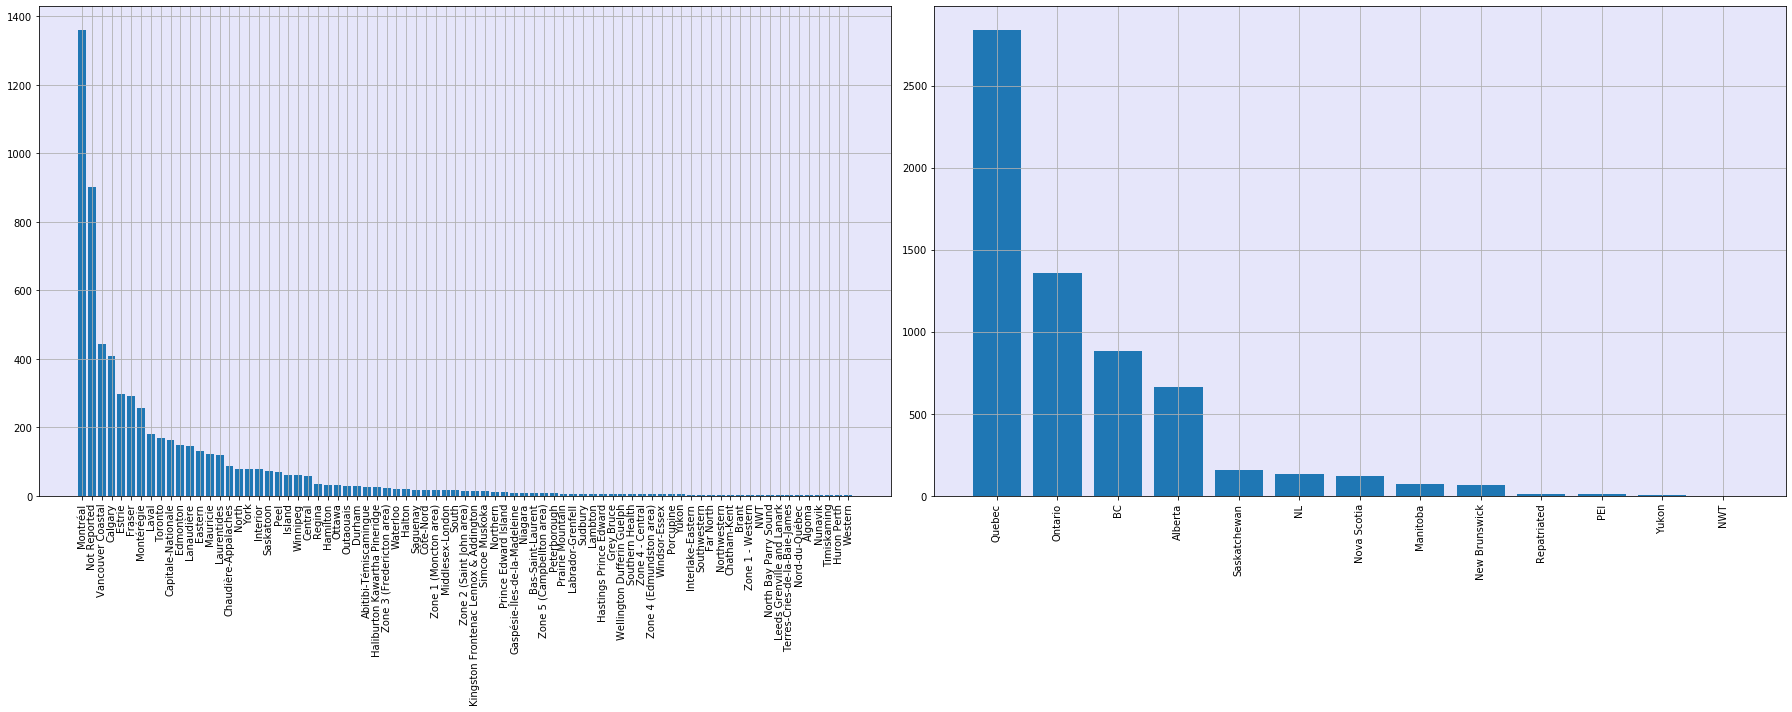

In [15]:
plt.subplots(1,2,figsize = (25,10))

ax1 = plt.subplot(121, facecolor = 'lavender')
plt.bar(n_cases['health_region'].value_counts().index, n_cases['health_region'].value_counts().values)
plt.xticks(rotation='vertical')
plt.grid(True)

ax2 = plt.subplot(122, facecolor = 'lavender')
plt.bar(n_cases['province'].value_counts().index, n_cases['province'].value_counts().values)
plt.xticks(rotation='vertical')
plt.grid(True)


plt.tight_layout()
plt.show()

In [16]:
n_travel = n_cases.loc[n_cases['travel_yn'] != 'Not Reported']

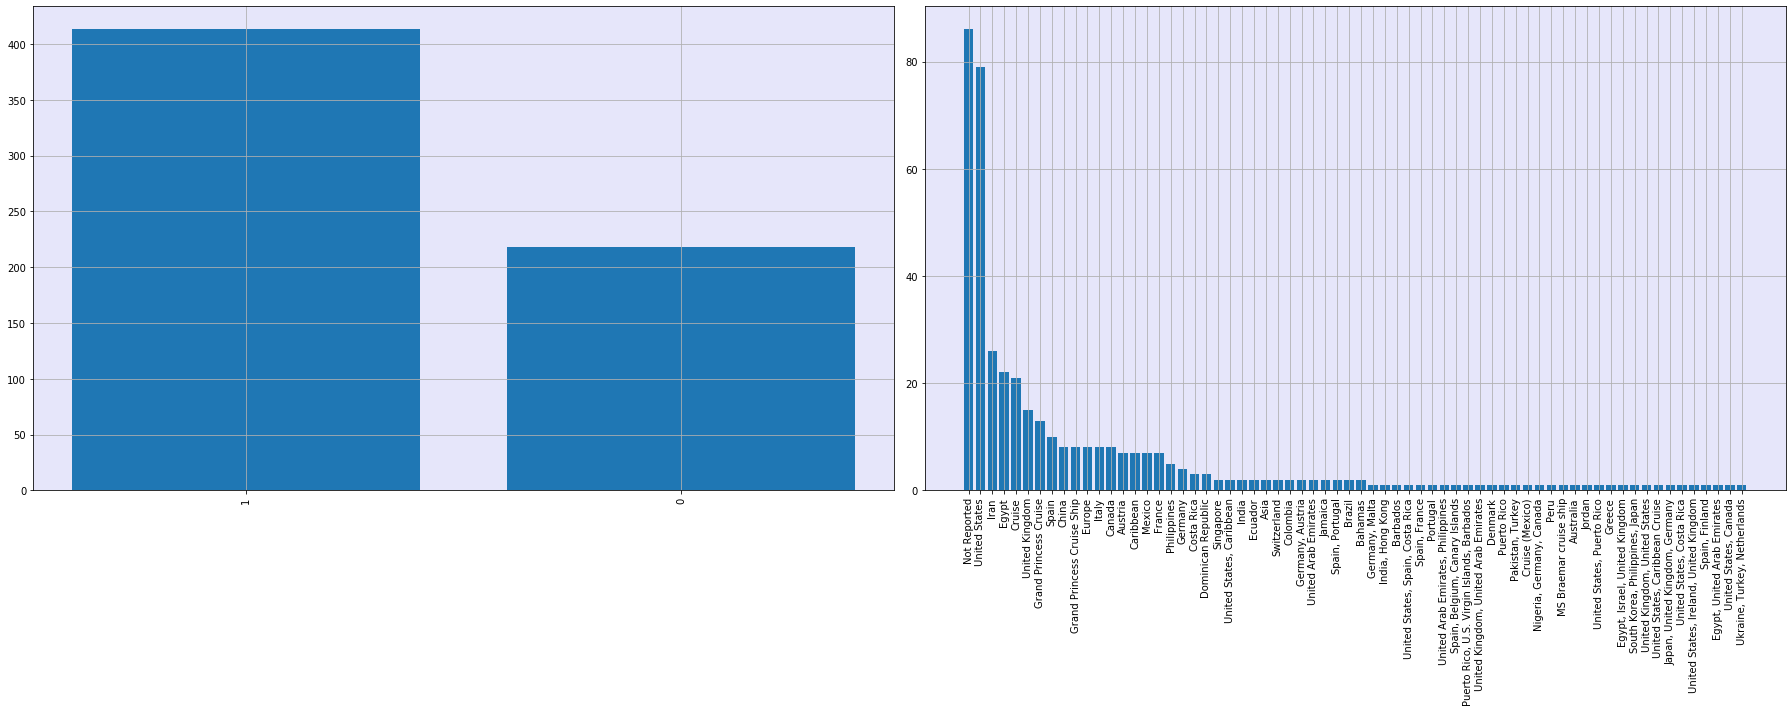

In [17]:
plt.subplots(1,2,figsize = (25,10))
plt.subplot(121, facecolor = 'lavender')
plt.bar(n_travel['travel_yn'].value_counts().index, n_travel['travel_yn'].value_counts().values)
plt.xticks(rotation='vertical')
plt.grid(True)


plt.subplot(122, facecolor = 'lavender')
plt.bar(n_cases['travel_history_country'].value_counts().index, n_cases['travel_history_country'].value_counts().values)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.tight_layout()
plt.show()


# Number of Deaths in Canada

In [18]:
display(n_death.head(1))

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,08-03-2020,https://news.gov.bc.ca/releases/2020HLTH0068-0...,Lynn Valley Resident,NaN


In [19]:
n_death

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,08-03-2020,https://news.gov.bc.ca/releases/2020HLTH0068-0...,Lynn Valley Resident,NaN
1,2,1,477.0,70-79,Male,Simcoe Muskoka,Ontario,Canada,11-03-2020,https://www.nationalobserver.com/2020/03/17/ne...,Was being treated at Royal Victoria Regional H...,NaN
2,3,2,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
3,4,3,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
4,5,4,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,https://news.gov.bc.ca/releases/2020HLTH0086-0...,Lynn Valley Resident,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,20,NaN,Not Reported,Not Reported,Simcoe Muskoka,Ontario,Canada,29-03-2020,https://toronto.ctvnews.ca/ontario-health-offi...,NaN,NaN
62,63,21,NaN,90-99,Female,Renfrew,Ontario,Canada,29-03-2020,https://www.ottawamatters.com/local-news/renfr...,Died at Pembroke Regional Hospital,https://toronto.ctvnews.ca/ontario-health-offi...
63,64,22,NaN,Not Reported,Not Reported,Not Reported,Ontario,Canada,29-03-2020,https://www.ontario.ca/page/2019-novel-coronav...,Awaiting further details. Will update if/when ...,NaN
64,65,23,NaN,Not Reported,Not Reported,Not Reported,Ontario,Canada,29-03-2020,https://www.ontario.ca/page/2019-novel-coronav...,Awaiting further details. Will update if/when ...,NaN
